<a href="https://colab.research.google.com/github/Kidar12/GDGoC_ML_Assignment-2/blob/main/Dataset_STP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving STP.csv to STP.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

df_stp = pd.read_csv('/content/STP.csv')
df_stp.head(10)

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3(Target),index
0,0,GP,F,NaN,U,GT3,A,4.0,-inf,at_home,...,NaN,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0,0
1,1,GP,F,-,U,GT3,T,1.0,1.0,at_home,...,3.0,3.0,-,NaN,3.0,2.0,9.0,-inf,11.0,1
2,2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,...,NaN,2.0,2.0,NaN,NaN,6.0,12.0,13.0,12.0,2
3,3,GP,F,15.0,U,GT3,T,4.0,NaN,health,...,NaN,NaN,1.0,1.0,5.0,0.0,NaN,inf,NaN,3
4,4,GP,F,16.0,U,GT3,T,3.0,3.0,other,...,-inf,2.0,inf,2.0,5.0,0.0,NaN,13.0,13.0,4
5,5,GP,M,16.0,U,LE3,T,4.0,3.0,services,...,4.0,2.0,1.0,NaN,NaN,6.0,12.0,12.0,13.0,5
6,6,GP,M,-inf,U,LE3,T,2.0,2.0,other,...,4.0,4.0,1.0,1.0,3.0,0.0,13.0,12.0,13.0,6
7,7,GP,F,17.0,U,GT3,A,4.0,NaN,other,...,1.0,4.0,NaN,-,1.0,2.0,10.0,13.0,13.0,7
8,8,GP,M,15.0,U,LE3,A,NaN,-,services,...,2.0,2.0,1.0,1.0,inf,0.0,15.0,NaN,17.0,8
9,9,GP,M,15.0,U,GT3,T,NaN,4.0,other,...,5.0,1.0,inf,NaN,NaN,0.0,12.0,12.0,13.0,9


In [4]:
rm = ['Unnamed: 0', 'index']
df_stp.drop(rm, axis=1, inplace=True)
df_stp.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3(Target)
0,GP,F,NaN,U,GT3,A,4.0,-inf,at_home,teacher,...,4.0,NaN,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,GP,F,-,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,-,NaN,3.0,2.0,9.0,-inf,11.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,NaN,2.0,2.0,NaN,NaN,6.0,12.0,13.0,12.0
3,GP,F,15.0,U,GT3,T,4.0,NaN,health,services,...,3.0,NaN,NaN,1.0,1.0,5.0,0.0,NaN,inf,NaN
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,-inf,2.0,inf,2.0,5.0,0.0,NaN,13.0,13.0
5,GP,M,16.0,U,LE3,T,4.0,3.0,services,other,...,5.0,4.0,2.0,1.0,NaN,NaN,6.0,12.0,12.0,13.0
6,GP,M,-inf,U,LE3,T,2.0,2.0,other,other,...,4.0,4.0,4.0,1.0,1.0,3.0,0.0,13.0,12.0,13.0
7,GP,F,17.0,U,GT3,A,4.0,NaN,other,teacher,...,NaN,1.0,4.0,NaN,-,1.0,2.0,10.0,13.0,13.0
8,GP,M,15.0,U,LE3,A,NaN,-,services,other,...,NaN,2.0,2.0,1.0,1.0,inf,0.0,15.0,NaN,17.0
9,GP,M,15.0,U,GT3,T,NaN,4.0,other,other,...,5.0,5.0,1.0,inf,NaN,NaN,0.0,12.0,12.0,13.0


In [11]:
df_stp['age'] = df_stp['age'].astype(str).str.replace('.', '')
df_stp['age'] = df_stp['age'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_stp['age'] = df_stp['age'].replace('', np.nan)
df_stp['age'].fillna(0, inplace=True)
df_stp['age'] = df_stp['age'].astype(int)

df_stp['Medu'] = df_stp['Medu'].astype(str).str.replace('.', '')
df_stp['Medu'] = df_stp['Medu'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_stp['Medu'] = df_stp['Medu'].replace('', np.nan)
df_stp['Medu'].fillna(0, inplace=True)
df_stp['Medu'] = df_stp['Medu'].astype(int)

df_stp['Fedu'] = df_stp['Fedu'].astype(str).str.replace('.', '')
df_stp['Fedu'] = df_stp['Fedu'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_stp['Fedu'] = df_stp['Fedu'].replace('', np.nan)
df_stp['Fedu'].fillna(0, inplace=True)
df_stp['Fedu'] = df_stp['Fedu'].astype(int)

df_stp['traveltime'] = df_stp['traveltime'].astype(str).str.replace('.', '')
df_stp['traveltime'] = df_stp['traveltime'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_stp['traveltime'] = df_stp['traveltime'].replace('', np.nan)
df_stp['traveltime'].fillna(0, inplace=True)
df_stp['traveltime'] = df_stp['traveltime'].astype(int)

df_stp['studytime'] = df_stp['studytime'].astype(str).str.replace('.', '')
df_stp['studytime'] = df_stp['studytime'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_stp['studytime'] = df_stp['studytime'].replace('', np.nan)
df_stp['studytime'].fillna(0, inplace=True)
df_stp['studytime'] = df_stp['studytime'].astype(int)

df_stp['failures'] = df_stp['failures'].astype(str).str.replace('.', '')
df_stp['failures'] = df_stp['failures'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_stp['failures'] = df_stp['failures'].replace('', np.nan)
df_stp['failures'].fillna(0, inplace=True)
df_stp['failures'] = df_stp['failures'].astype(int)

df_stp['famrel'] = df_stp['famrel'].astype(str).str.replace('.', '')
df_stp['famrel'] = df_stp['famrel'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_stp['famrel'] = df_stp['famrel'].replace('', np.nan)
df_stp['famrel'].fillna(0, inplace=True)
df_stp['famrel'] = df_stp['famrel'].astype(int)

df_stp['freetime'] = df_stp['freetime'].astype(str).str.replace('.', '')
df_stp['freetime'] = df_stp['freetime'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_stp['freetime'] = df_stp['freetime'].replace('', np.nan)
df_stp['freetime'].fillna(0, inplace=True)
df_stp['freetime'] = df_stp['freetime'].astype(int)

df_stp['goout'] = df_stp['goout'].astype(str).str.replace('.', '')
df_stp['goout'] = df_stp['goout'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_stp['goout'] = df_stp['goout'].replace('', np.nan)
df_stp['goout'].fillna(0, inplace=True)
df_stp['goout'] = df_stp['goout'].astype(int)

df_stp['Dalc'] = df_stp['Dalc'].astype(str).str.replace('.', '')
df_stp['Dalc'] = df_stp['Dalc'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_stp['Dalc'] = df_stp['Dalc'].replace('', np.nan)
df_stp['Dalc'].fillna(0, inplace=True)
df_stp['Dalc'] = df_stp['Dalc'].astype(int)

df_stp['Walc'] = df_stp['Walc'].astype(str).str.replace('.', '')
df_stp['Walc'] = df_stp['Walc'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_stp['Walc'] = df_stp['Walc'].replace('', np.nan)
df_stp['Walc'].fillna(0, inplace=True)
df_stp['Walc'] = df_stp['Walc'].astype(int)

df_stp['health'] = df_stp['health'].astype(str).str.replace('.', '')
df_stp['health'] = df_stp['health'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_stp['health'] = df_stp['health'].replace('', np.nan)
df_stp['health'].fillna(0, inplace=True)
df_stp['health'] = df_stp['health'].astype(int)

df_stp['absences'] = df_stp['absences'].astype(str).str.replace('.', '')
df_stp['absences'] = df_stp['absences'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_stp['absences'] = df_stp['absences'].replace('', np.nan)
df_stp['absences'].fillna(0, inplace=True)
df_stp['absences'] = df_stp['absences'].astype(int)

In [12]:
df_stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [13]:
fix = ['G1', 'G2', 'G3(Target)']

df_stp[fix] = df_stp[fix].apply(pd.to_numeric, errors='coerce')
df_stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1044 non-null   int64  
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  1044 non-null   int64  
 13  studytime   1044 non-null   int64  
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non-null  

In [14]:
df_stp.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [15]:
num_cols = df_stp.select_dtypes(include=np.number).columns
df_stp[num_cols] = df_stp[num_cols].fillna(df_stp[num_cols].median())

cat_cols = df_stp.select_dtypes(include='object').columns
for col in cat_cols:
    df_stp[col].fillna(df_stp[col].mode()[0], inplace=True)

print(df_stp.isna().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3(Target)    0
dtype: int64


In [16]:
df_stp.duplicated().sum()

0

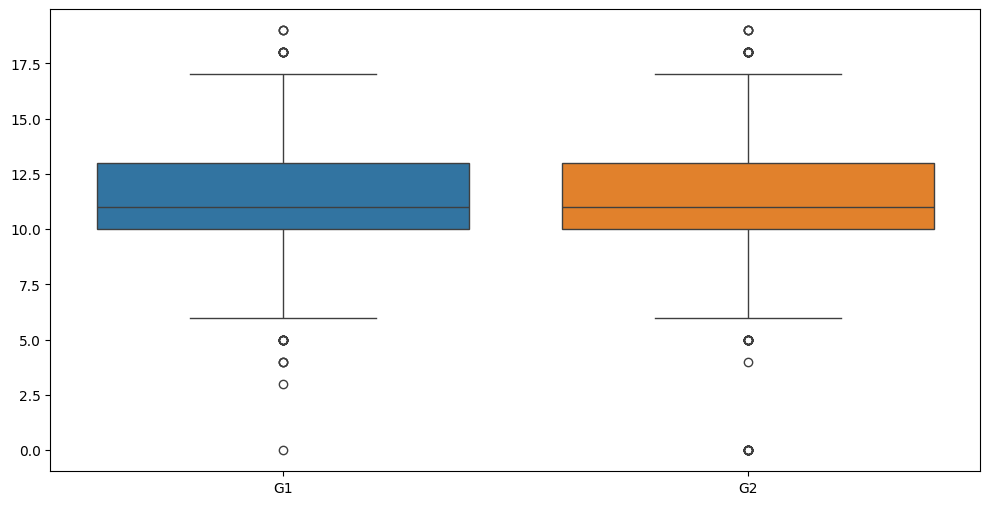

In [17]:
num = ['G1', 'G2']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_stp[num])
plt.show()

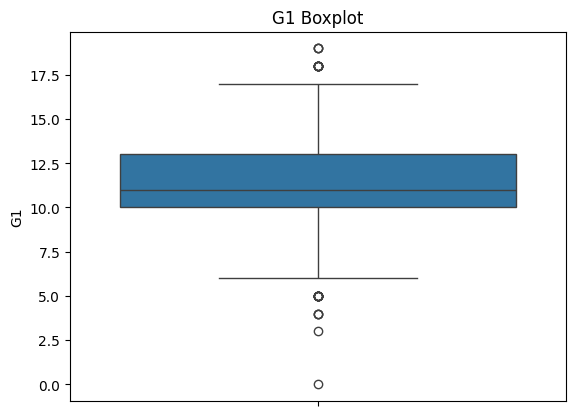

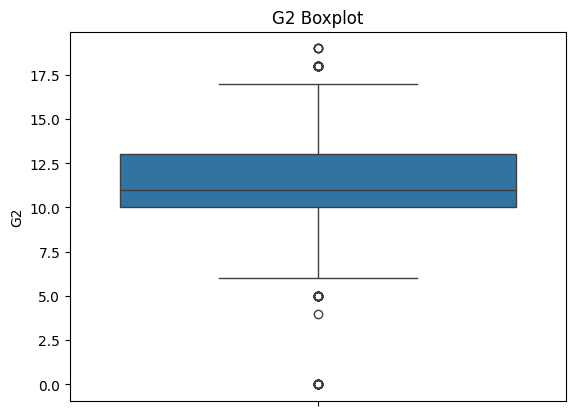

In [18]:
sns.boxplot(data=df_stp['G1'])
plt.title('G1 Boxplot')
plt.show()

sns.boxplot(data=df_stp['G2'])
plt.title('G2 Boxplot')
plt.show()

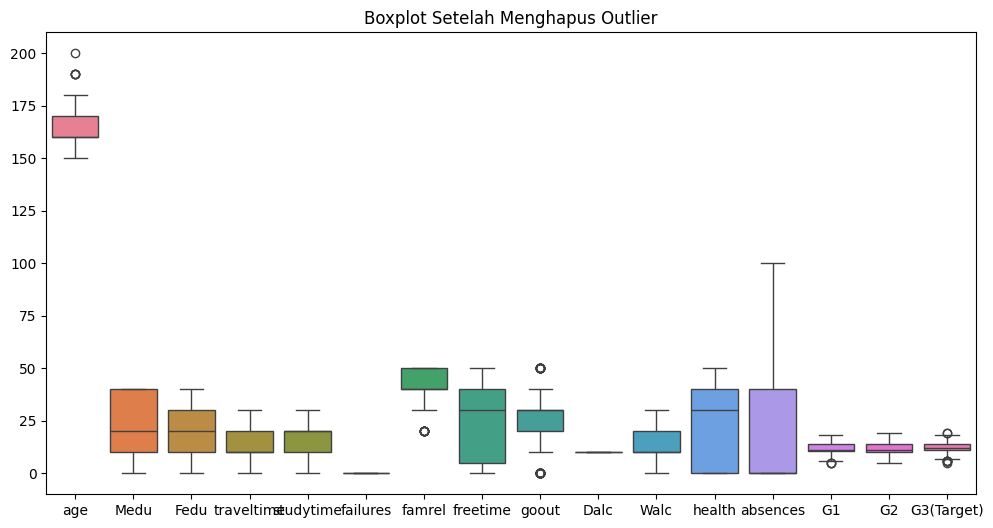

In [19]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for col in num_cols:
    df_stp = remove_outliers(df_stp, col)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_stp[num_cols])
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()


In [20]:
df_stp['G1 Category'] = pd.qcut(df_stp['G1'], q=3, labels=['Low', 'Medium', 'High'])
df_stp['G2 Category'] = pd.qcut(df_stp['G2'], q=3, labels=['A', 'B', 'C'])

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num = ['G1', 'G2']
df_stp[num] = scaler.fit_transform(df_stp[num])

In [22]:
df_stp['G1'].skew(), df_stp['G2'].skew()

(-0.06888371259976163, 0.26295883592147684)

In [23]:
x = df_stp.drop('G3(Target)', axis=1)
y = df_stp['G3(Target)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((164, 34), (55, 34), (164,), (55,))

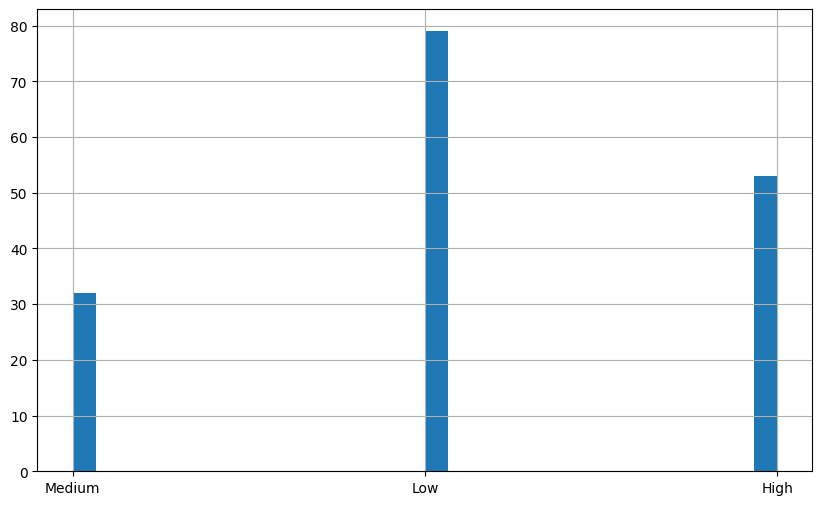

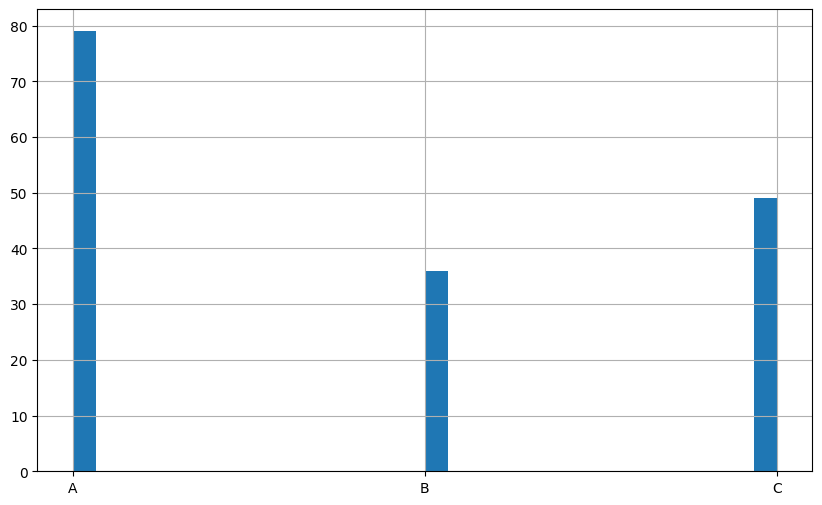

In [24]:
x_train['G1 Category'].hist(bins=30, figsize=(10,6))
plt.show()

x_train['G2 Category'].hist(bins=30, figsize=(10,6))
plt.show()

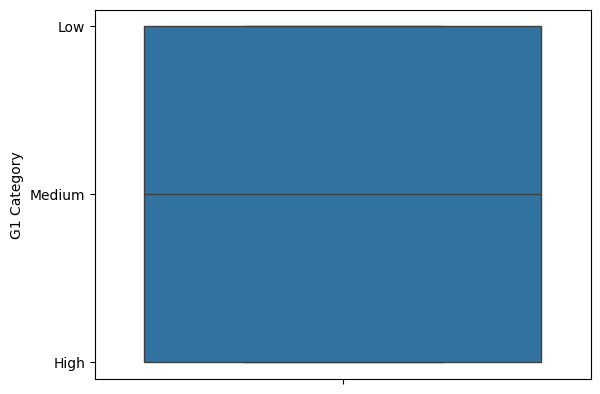

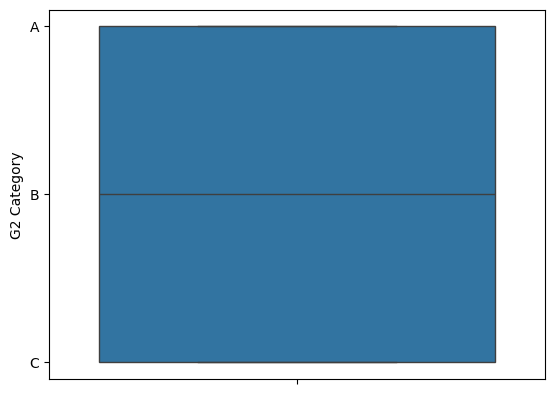

In [25]:
sns.boxplot(data=x_train['G1 Category'])
plt.show()

sns.boxplot(data=x_train['G2 Category'])
plt.show()

In [26]:
categorical_cols = x_train.select_dtypes(include=['object']).columns

print('-'*50)
for col in categorical_cols:
    print(x_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
school
GP    132
MS     32
Name: count, dtype: int64
--------------------------------------------------
sex
F    103
M     61
Name: count, dtype: int64
--------------------------------------------------
address
U    135
R     29
Name: count, dtype: int64
--------------------------------------------------
famsize
GT3    122
LE3     42
Name: count, dtype: int64
--------------------------------------------------
Pstatus
T    141
A     23
Name: count, dtype: int64
--------------------------------------------------
Mjob
other       64
services    39
at_home     25
teacher     22
health      14
Name: count, dtype: int64
--------------------------------------------------
Fjob
other       103
services     36
at_home      10
teacher      10
health        5
Name: count, dtype: int64
--------------------------------------------------
reason
course        73
reputation    46
home          30
other         15
Name: count, dtype: int64
-------------

In [27]:
x_train = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)
x_train.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
107,160,30,30,10,30,0,50,30,30,10,...,False,False,False,True,False,True,True,True,True,False
55,160,20,0,0,0,0,50,0,40,10,...,True,False,False,False,False,True,True,True,True,True
310,180,20,0,20,20,0,40,30,50,10,...,True,False,False,True,False,False,True,False,True,True
984,170,30,40,10,30,0,40,40,50,10,...,True,False,False,False,False,False,True,True,True,False
276,160,20,10,30,10,0,40,0,30,10,...,True,False,False,False,False,False,True,True,True,False
309,180,40,20,10,20,0,50,0,50,10,...,False,False,False,True,False,True,True,True,True,True
15,160,40,40,0,10,0,40,40,40,10,...,True,False,False,True,False,False,True,True,True,False
671,160,40,20,10,20,0,40,50,10,10,...,True,False,False,False,False,True,True,True,True,False
244,170,40,30,10,0,0,30,20,30,10,...,False,False,False,False,False,True,True,True,True,True
548,170,10,10,10,20,0,40,50,50,10,...,True,False,False,False,False,True,True,True,True,True


In [28]:
x_train.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G1 Category', 'G2 Category', 'school_MS', 'sex_M', 'address_U',
       'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other',
       'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes',
       'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes'],
      dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

all_unique_values = pd.concat([pd.Series(y_train), pd.Series(y_test)]).unique()
le.fit(all_unique_values)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

y_train

array([ 9,  7,  5, 10, 11,  9, 12, 11,  7,  6,  1, 13, 11,  6, 12,  4, 13,
        7,  6,  5,  6,  6, 13, 10,  7,  5, 10, 10,  3,  6, 12, 14, 10, 10,
        8,  9,  7,  9,  8,  1,  2, 12,  8, 10, 11,  3,  7,  6, 11,  1,  5,
        9, 10,  6,  4,  9,  7,  6,  6,  1, 10,  6,  6,  9,  7,  6,  7, 10,
        5, 10,  6,  5,  8,  6, 11,  6, 10,  9, 10,  6,  6,  9, 11, 14,  7,
       12,  5,  2,  6, 11, 10,  8,  5,  6,  8,  6,  6,  6,  5,  6,  4,  9,
        5,  8,  9,  9,  8,  9,  3,  5, 12,  7,  6,  9,  7, 10,  5,  9,  9,
        6,  9,  5, 10,  6,  6,  6,  6,  6, 10,  6,  6,  7, 13,  9,  8,  6,
        6,  6,  6,  6,  8,  5, 11,  8,  8, 11,  6,  0,  6,  9,  6,  6,  9,
       11, 12,  5, 11,  7,  9,  5,  9,  6,  5,  6])

In [30]:
print(f'Train Label  \n{pd.Series(y_train).value_counts()}')
print()
print(f'Test Label \n{pd.Series(y_test).value_counts()}')

Train Label  
6     44
9     22
5     17
10    17
7     14
11    12
8     12
12     7
1      4
13     4
4      3
3      3
14     2
2      2
0      1
Name: count, dtype: int64

Test Label 
6     16
5      6
9      6
8      5
3      4
11     4
10     4
7      3
4      2
13     2
2      1
1      1
12     1
Name: count, dtype: int64


In [31]:
x_train['G3(Target)'] = y_train
x_test['G3(Target)'] = y_test

In [32]:
x_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 107 to 498
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                164 non-null    int64   
 1   Medu               164 non-null    int64   
 2   Fedu               164 non-null    int64   
 3   traveltime         164 non-null    int64   
 4   studytime          164 non-null    int64   
 5   failures           164 non-null    int64   
 6   famrel             164 non-null    int64   
 7   freetime           164 non-null    int64   
 8   goout              164 non-null    int64   
 9   Dalc               164 non-null    int64   
 10  Walc               164 non-null    int64   
 11  health             164 non-null    int64   
 12  absences           164 non-null    int64   
 13  G1                 164 non-null    float64 
 14  G2                 164 non-null    float64 
 15  G1 Category        164 non-null    category
 16  G2 Category

In [33]:
x_test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 739 to 596
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                55 non-null     int64   
 1   Medu               55 non-null     int64   
 2   Fedu               55 non-null     int64   
 3   traveltime         55 non-null     int64   
 4   studytime          55 non-null     int64   
 5   failures           55 non-null     int64   
 6   famrel             55 non-null     int64   
 7   freetime           55 non-null     int64   
 8   goout              55 non-null     int64   
 9   Dalc               55 non-null     int64   
 10  Walc               55 non-null     int64   
 11  health             55 non-null     int64   
 12  absences           55 non-null     int64   
 13  G1                 55 non-null     float64 
 14  G2                 55 non-null     float64 
 15  G1 Category        55 non-null     category
 16  G2 Category 

In [34]:
print("Train missing data:", x_train.isna().sum().sum(), "\nTest missing data:", x_test.isna().sum().sum())
print()
print("Train duplicated data:", x_train.duplicated().sum(), "\nTest duplicated data:", x_test.duplicated().sum())

Train missing data: 0 
Test missing data: 0

Train duplicated data: 0 
Test duplicated data: 0
